# Import data

In [109]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_palette(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])


In [110]:
files = [file for file in os.listdir('E:\ecommerce_sales_analysis-main\dataset')] 
df = pd.DataFrame()
for i in files:
    data = pd.read_csv('dataset/'+i)
    df = pd.concat([df,data],axis=0)
df.shape

(186850, 6)

# Data cleaning

In [111]:
#Exclude header for each dataset inside dataframe
df = df[df['Order ID'] != 'Order ID']

In [112]:
df = df.reset_index()
df = df.drop(columns='index')

In [113]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
37041,302075,USB-C Charging Cable,1,11.95,12/11/19 22:12,"497 2nd St, San Francisco, CA 94016"
8161,184364,Wired Headphones,1,11.99,04/02/19 22:52,"813 North St, Portland, OR 97035"
3028,179462,AAA Batteries (4-pack),1,2.99,04/22/19 12:38,"790 5th St, Seattle, WA 98101"
9546,185687,27in 4K Gaming Monitor,1,389.99,04/17/19 14:55,"493 Lincoln St, New York City, NY 10001"
161348,265922,Wired Headphones,1,11.99,10/12/19 18:55,"723 West St, San Francisco, CA 94016"


In [114]:
#Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186495 entries, 0 to 186494
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


There is feature that have incorrect type in Quantity Ordered, Price Each and Order Date.

In [115]:
#Check null values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [116]:
#Check null values
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1430,NaN,NaN,NaN,NaN,NaN,NaN
1550,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184825,NaN,NaN,NaN,NaN,NaN,NaN
185087,NaN,NaN,NaN,NaN,NaN,NaN
185690,NaN,NaN,NaN,NaN,NaN,NaN
186196,NaN,NaN,NaN,NaN,NaN,NaN


Missing values caused by no entry avalaible.

In [117]:
#Drop null vales
df = df.dropna()

# Data preparation

In [91]:
#Correcting data types
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [92]:
#Adding new feature
def feature_extraction(data):
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data 

In [93]:
df = feature_extraction(df)
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
20332,238581,Bose SoundSport Headphones,2,99.99,2019-08-03 22:59:00,"759 Main St, San Francisco, CA 94016",2019,8,22,59,199.98,San Francisco (CA)
99810,217898,Lightning Charging Cable,1,14.95,2019-06-30 08:10:00,"984 Park St, Los Angeles, CA 90001",2019,6,8,10,14.95,Los Angeles (CA)
92032,210467,AA Batteries (4-pack),1,3.84,2019-06-01 21:17:00,"286 Jefferson St, San Francisco, CA 94016",2019,6,21,17,3.84,San Francisco (CA)


# Analysis

## Descriptive analysis
descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [94]:
df.describe()

,Quantity Ordered,Price Each,Order Date,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464,2019.000183,7.059140,14.413305,29.481361,185.490917
min,1.000000,2.990000,2019-01-01 03:07:00,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019-04-16 21:05:15,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019-07-17 20:40:30,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019-10-26 08:14:00,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020-01-01 05:13:00,2020.000000,12.000000,23.000000,59.000000,3400.000000
std,0.442793,332.731330,NaN,0.013521,3.502996,5.423416,17.317573,332.919771


There is still data in year 2020, lets exclude them.

In [95]:
#Select only for year 2019
df = df[df['Year']==2019]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185916 entries, 0 to 186494
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  object        
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  int64         
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Purchase Address  185916 non-null  object        
 6   Year              185916 non-null  int32         
 7   Month             185916 non-null  int32         
 8   Hour              185916 non-null  int32         
 9   Minute            185916 non-null  int32         
 10  Sales             185916 non-null  float64       
 11  Cities            185916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(4)
memory usage: 15.6+ MB


In [97]:
total_year_order = df.shape[0]
total_product_sold = df['Quantity Ordered'].sum()
total_year_sales = df['Sales'].sum()

print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 185,916 orders
Total products sold in 2019 : 209,038 items
Total sales in 2019 : 34,483,365.68 USD


## Univariate analysis
Univariate analysis is basically the simplest form to analyze data. The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data.

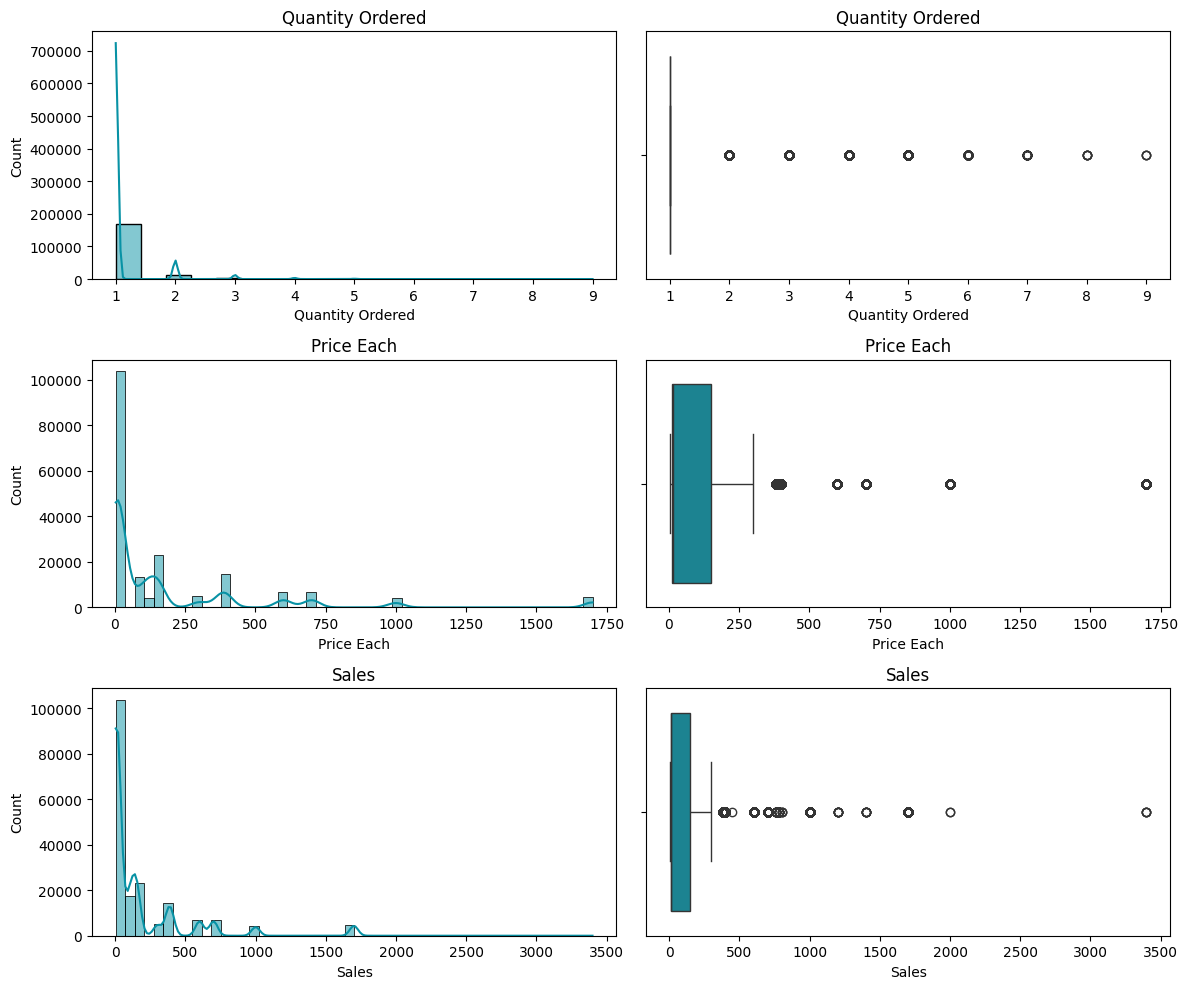

In [98]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
sns.histplot(data=df,x='Quantity Ordered',kde=True,ax=ax[0,0])
sns.histplot(data=df,x='Price Each',kde=True,ax=ax[1,0],bins=50)
sns.histplot(data=df,x='Sales',kde=True,ax=ax[2,0],bins=50)

ax[0,0].set_title('Quantity Ordered')
ax[1,0].set_title('Price Each')
ax[2,0].set_title('Sales')

sns.boxplot(data=df,x='Quantity Ordered',ax=ax[0,1])
sns.boxplot(data=df,x='Price Each',ax=ax[1,1])
sns.boxplot(data=df,x='Sales',ax=ax[2,1])

ax[0,1].set_title('Quantity Ordered')
ax[1,1].set_title('Price Each')
ax[2,1].set_title('Sales')

plt.tight_layout()
plt.show()

Interpretation :
- Mostly customer buys 1 item, some small protion buy 2 items once and customer buys more than 2 is rare.
- Price per item mostly in range 11.95 to 150.00.
- Sales range are 11.95 to 150.00.

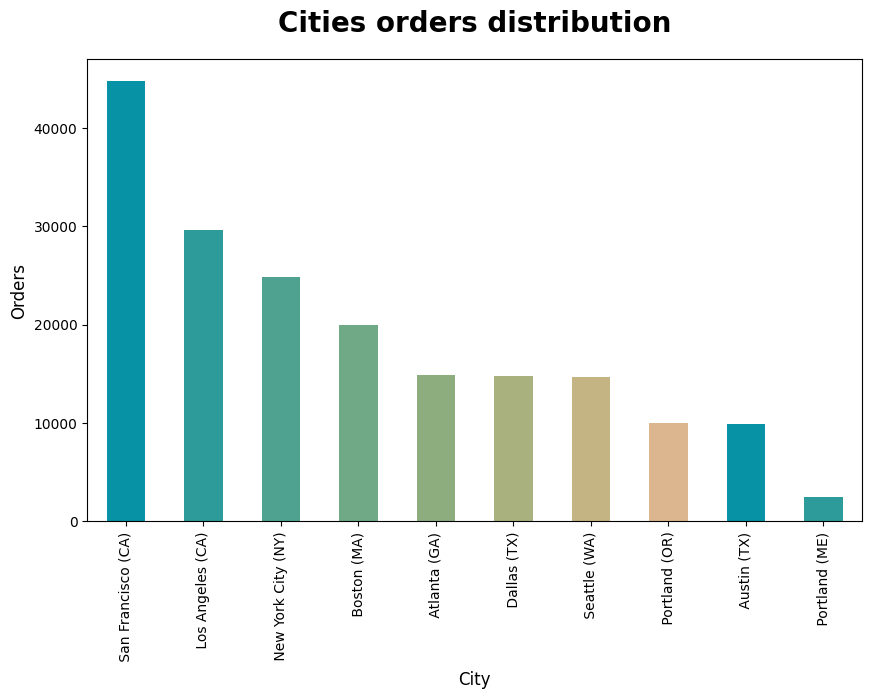

In [99]:
plt.figure(figsize=(10,6))

df['Cities'].value_counts().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
# sns.countplot(df['Cities'])
plt.title('Cities orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('City',fontsize=12)
plt.show()

Most of orders are from California (CA) specificly from San Francisco and Los Angeles around more than 40,000 and 30,000 orders. Average orders in cities are around 18,000 orders.

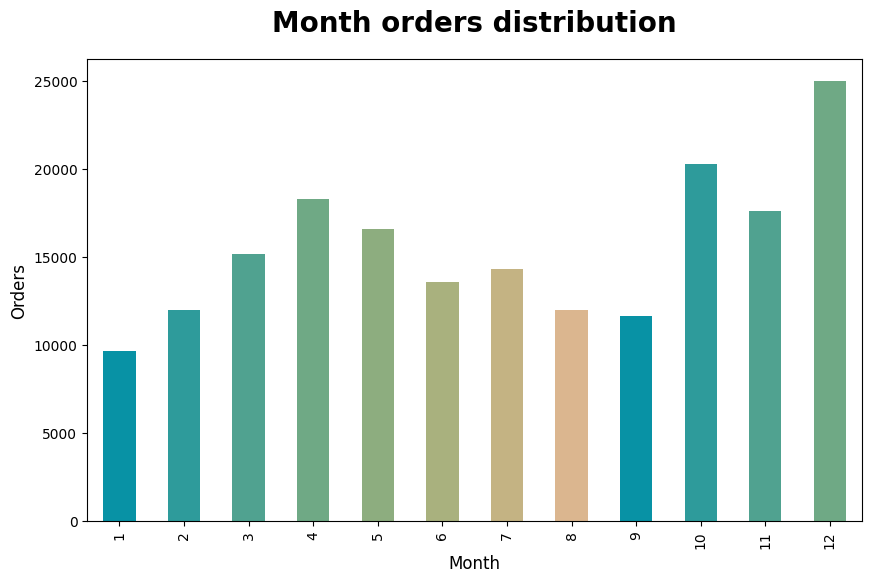

In [100]:
plt.figure(figsize=(10,6))
df['Month'].value_counts().sort_index().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Month orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.show()

High order are happend in December and October that have 25,000 and 20,000 orders. There is increasing order in January to April then decrease to September.

## Multivariate Analysis
Multivariate analysis is defined as: The statistical study of data where multiple measurements are made on each experimental unit and where the relationships among multivariate measurements and their structure are important.

Features have weak correlation

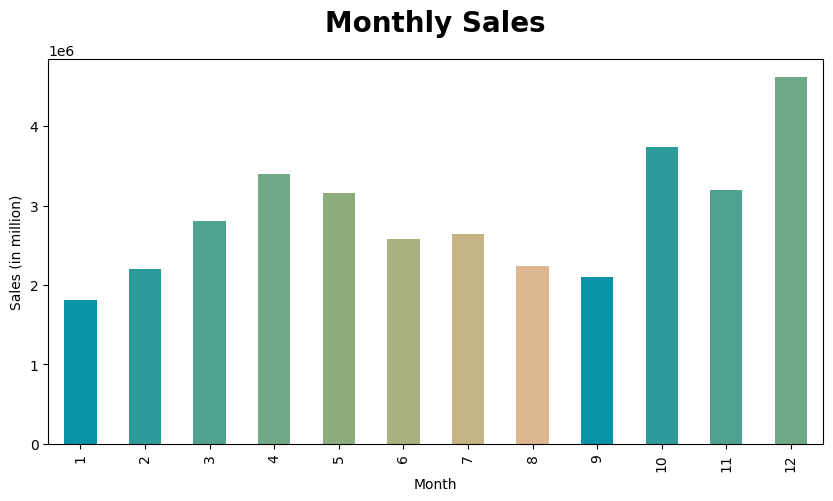

In [101]:
df_month = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,5))
df_month.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Monthly Sales',weight='bold',fontsize=20,pad=20)
plt.ylabel('Sales (in million)')
plt.show()

High order are happend in December and October that have 4,5 million and 3,5 million. There is increasing order in January to April then decrease to September.

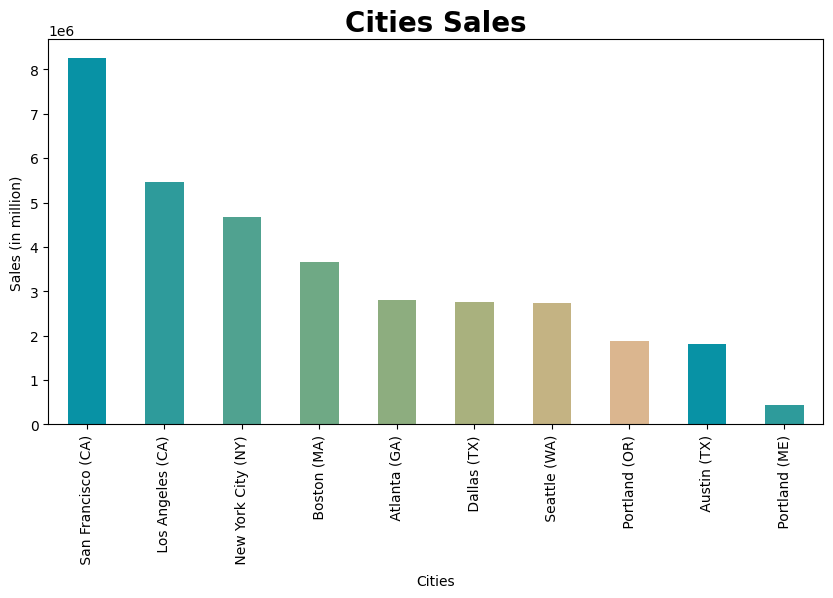

In [102]:
df_city = df.groupby('Cities')['Sales'].sum()
plt.figure(figsize=(10,5))
df_city.sort_values(ascending=False).plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Cities Sales',weight='bold',fontsize=20)
plt.ylabel('Sales (in million)')

plt.show()

Highest sales are from San Francisco around 8,1 million.

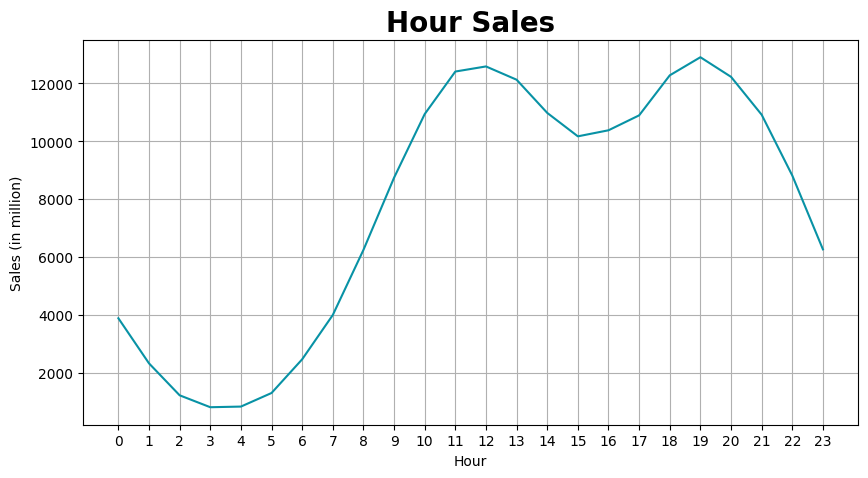

In [103]:
df_hour = df.groupby('Hour')['Quantity Ordered'].count()
plt.figure(figsize=(10,5))
plt.plot(df_hour.index,df_hour.values)
plt.title('Hour Sales',weight='bold',fontsize=20)
plt.grid(True)
plt.xticks(ticks=df_hour.index)
plt.ylabel('Sales (in million)')
plt.xlabel('Hour')


plt.show()


There is peak of sales in around 9:00 to 21:00.

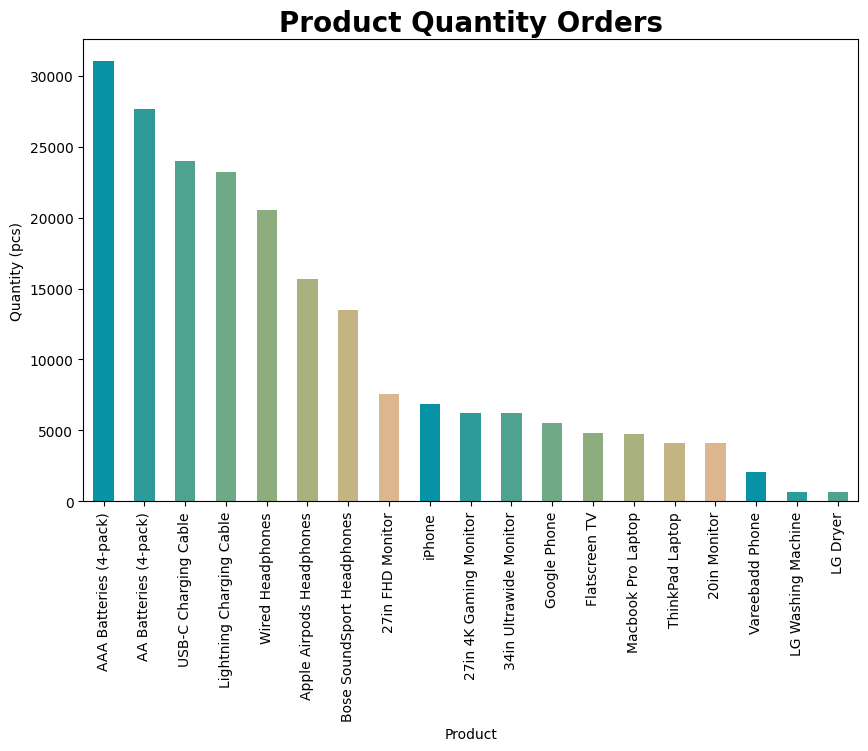

In [104]:
df_product = df.groupby('Product')['Quantity Ordered'].sum()
df_product = df_product.sort_values(ascending=False)

plt.figure(figsize=(10,6))
df_product.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Product Quantity Orders',weight='bold',fontsize=20)

plt.ylabel('Quantity (pcs)')

plt.show()

Top product sold are on Battery products, then followed by Charging Cable, and Headphones.

## Market basket analysis
Market basket analysis is a data mining technique used by retailers to increase sales by better understanding customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.

In [105]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = df[df['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# # let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# # create a new variable for Counter
count = Counter()
# # make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# # and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


From combination data above we can recommend some bundle for customer to increase sales.
1. iPhone bundle :
   iPhone buyers likely to buy Lightning Charging Cable, Wired Headphones or Apple Airpods Headphones. So in bundle we can give some choices:
     - iPhone + Lightning Charging Cable + Wired Headphones
     - iPhone + Lightning Charging Cable + Apple Airpods Headphones
2. Google Phone Bundle :
   Google Phone buyers likely to buy USB-C Charging Cable, Wired Headphones,Bose SoundSport Headphones. So in bundle we can give some choices:
   - Google Phone + USB-C Charging Cable + Wired Headphones
   - Google Phone + USB-C Charging Cable + Bose SoundSport Headphones

## Purchase Probability

In [106]:
def proba_prod(product):
    product_size = df.shape[0]
    product_size1 = df[df.Product == product]
    product_size_ = product_size1.shape[0]
    prob_year = round(product_size_/product_size*100,2)
    
    product_month = []
    product_month1 = []
    prob_month = []
    for i in range(1,13):
        prod_size = df[df['Month']==i].shape[0]
        product_month.append(prod_size)
        prod_size1 = product_size1[product_size1['Month']==i].shape[0]
        product_month1.append(prod_size1)
    for a,b in zip(product_month1, product_month):
        prob = round(a/b,3)
        prob_month.append(prob)
    return np.array(prob_month),prob_year

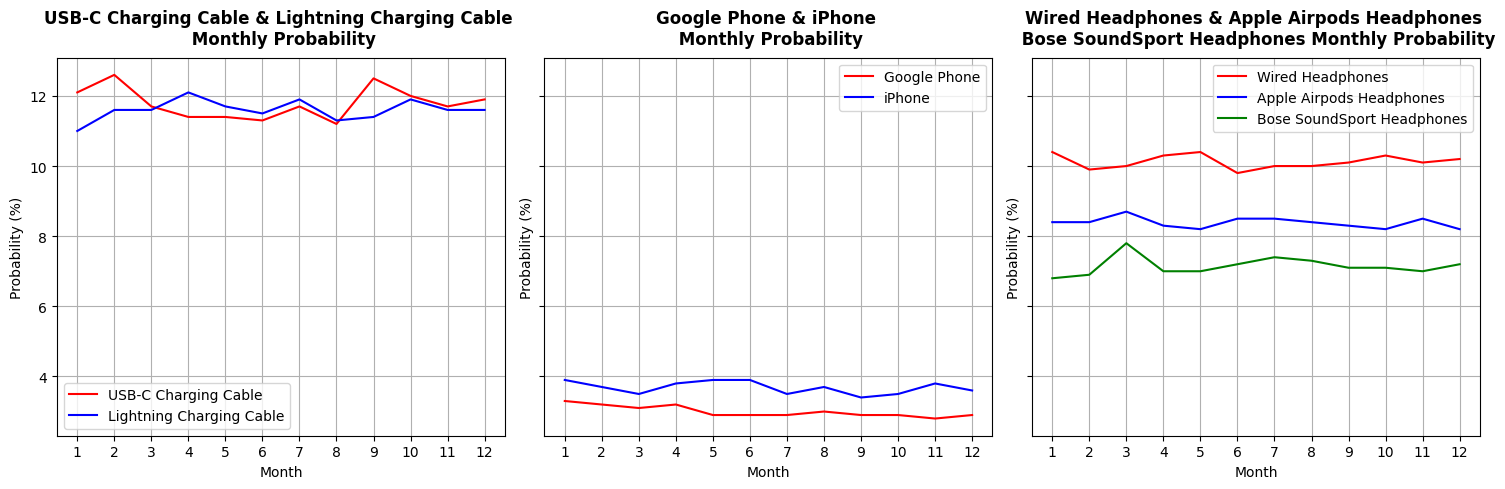

Probability in year USB-C Charging Cable : 11.78
Probability in year Lightning Charging Cable : 11.65
Probability in year Google Phone : 2.97
Probability in year iPhone : 3.68
Probability in year Wired Headphones : 10.16
Probability in year Apple Airpods Headphones : 8.36
Probability in year Bose SoundSport Headphones : 7.17


In [107]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
prod1 = 'USB-C Charging Cable'
ax[0].plot(range(1,13),(proba_prod(prod1)[0]*100),label='USB-C Charging Cable',color='r')
prod2 = 'Lightning Charging Cable'
ax[0].plot(range(1,13),(proba_prod(prod2)[0]*100),label='Lightning Charging Cable',color='b')
# ax[0].set_ylim(0,15)
ax[0].set_title(f'{prod1} & {prod2} \n Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[0].grid()
ax[0].set_xticks(range(1,13))
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Probability (%)')
ax[0].legend()



prod1 = 'Google Phone'
ax[1].plot(range(1,13),(proba_prod(prod1)[0]*100),label='Google Phone',color='r')
prod2 = 'iPhone'
ax[1].plot(range(1,13),(proba_prod(prod2)[0]*100),label='iPhone',color='b')
# ax[1].set_ylim(0,6)
ax[1].set_title(f'{prod1} & {prod2} \n Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[1].grid(True)
ax[1].set_xticks(range(1,13))
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Probability (%)')
ax[1].legend()

prod1 = 'Wired Headphones'
ax[2].plot(range(1,13),(proba_prod(prod1)[0]*100),label='Wired Headphones',color='r')
prod2 = 'Apple Airpods Headphones'
ax[2].plot(range(1,13),(proba_prod(prod2)[0]*100),label='Apple Airpods Headphones',color='b')
prod3 = 'Bose SoundSport Headphones'
ax[2].plot(range(1,13),(proba_prod(prod3)[0]*100),label='Bose SoundSport Headphones',color='g')
# ax[2].set_ylim(0,12)
ax[2].set_title(f'{prod1} & {prod2} \n {prod3} Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[2].grid(True)
ax[2].set_xticks(range(1,13))
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Probability (%)')
ax[2].legend()

plt.tight_layout()
plt.show()

prods =['USB-C Charging Cable', 'Lightning Charging Cable','Google Phone','iPhone',
        'Wired Headphones','Apple Airpods Headphones','Bose SoundSport Headphones']
for i in prods:
    print(f'Probability in year {i} : {proba_prod(i)[1]}')

Probability for next customer will order the product are different for each products, so i simplify based on product type:
1. Charging cable <br>
    USB-C and Lightning cable have close probability which is aroung 11%
2. Phones <br>
    iPhone have higher chances to get orders than Google Phones.
3. Headphones <br>
    From 3 types of Headphones, Wired, Apple Airpods and Bose. Wired Headphones have highest probability to get ordered on next customer.

# Summary

In [108]:
print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 185,916 orders
Total products sold in 2019 : 209,038 items
Total sales in 2019 : 34,483,365.68 USD



ytytAnalysis result for E-commerce sales data :
1. Summary metrics :
    - Total orders in 2019 : 185,916 orders
    - Total products sold in 2019 : 209,038 items
    - Total sales in 2019 : 34,483,365.68 USD
    - Sales range are 11.95 to 150.00.
    - Most of orders are from San Francisco (CA) with 40,000 orders and 8,1 million sales. 
    - Average orders in cities are around 18,000 orders.
    

2. Customer behavior :
    - Mostly customer order 1 item, some small protion buy 2 items once and customer buys more than 2 is rare.
    - There is peak of sales in around 9:00 to 21:00. This data can be potentialy became support to post advertising on that time.
    - Most product sold are on Battery products, then followed by Charging Cable, and Headphones.
    - High sales are happend in December that have 25,000 orders and 4,5 million sales . There is increasing order in January to April then decrease to September.
3. Bundle recommendation to increasing sales :
    * iPhone bundle :
       iPhone buyers likely to buy Lightning Charging Cable, Wired Headphones or Apple Airpods Headphones. So in bundle we can give some choices:
         - iPhone + Lightning Charging Cable + Wired Headphones
         - iPhone + Lightning Charging Cable + Apple Airpods Headphones
    * Google Phone Bundle :
       Google Phone buyers likely to buy USB-C Charging Cable, Wired Headphones,Bose SoundSport Headphones. So in bundle we can give some choices:
       - Google Phone + USB-C Charging Cable + Wired Headphones
       - Google Phone + USB-C Charging Cable + Bose SoundSport Headphones
       
4. Probability order on product type:
    - Charging cable <br>
    USB-C and Lightning cable have close probability which is around 11%
    - Phones <br>
    iPhone have higher chances to get orders (3.68%) than Google Phones (2.97%).
    - Headphones <br>
    From 3 types of Headphones, Wired, Apple Airpods and Bose. Wired Headphones have highest probability (10.16%) to get ordered on next customer.